## Detección de la Estación Espacial Internacional

Comenzaremos con una simulación que, si bien no tiene tanto interés como finalidad, es interesante para comenzar a usar ciertos paquetes y estructuras en el código que sí que serán de gran utilidad para otro tipo de trabajos.
Simularemos así la posición de la Estación Espacial Internacional (ISS). El código para ello es bastante simple, y se organiza en 3 bloques principales. 

En primer lugar importamos los paquetes necesarios para nuestra simulación, el primero de ellos es **requests**, el cual nos permite realizar una solicitud HTTP para obtener información de una página web y obtener datos de ella, en este caso, sobre la posición actual de la Estación Espacial Internacional. El siguiente paquete es **pandas** y que trata los datos JSON obtenidos de la página web a un formato en tablas para su acceso y manipulación. Los dos últimos son paquetes estéticos, de visualización; **matplotlib** es utilizado para realizar representaciones gráficas, mientras que **basemap** nos permite crear un mapa del mundo para proyectar las coordenadas adquiridas.

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Una vez importados nuestros paquetes, definimos en primer lugar la *url* a partir de la cual obtendremos los datos de posición de la ISS buscados mediante el paquete **requests**, y que serán interpretados como formato JSON y almacenados en la variable *data*.

A continuación, y utilizando **pandas**, creamos un DataFrame con los datos para poder trabajar fácilmente con ellos, y a partir del cual extraemos la latitud y la longitud.

In [ ]:
url = 'http://api.open-notify.org/iss-now.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['iss_position'], index=[0])

latitude = float(df['latitude'].iloc[0])
longitude = float(df['longitude'].iloc[0])

Con todo ello, ya tenemos las coordenadas buscadas con la posición actual de la ISS, faltando únicamente su representación. 
Esto puede hacerse al gusto de cada uno, yo voy a establecer un mapa del mundo con **basemap** y un punto con la representación de las coordenadas de latitud y longitud para hacerlo lo más simple posible.

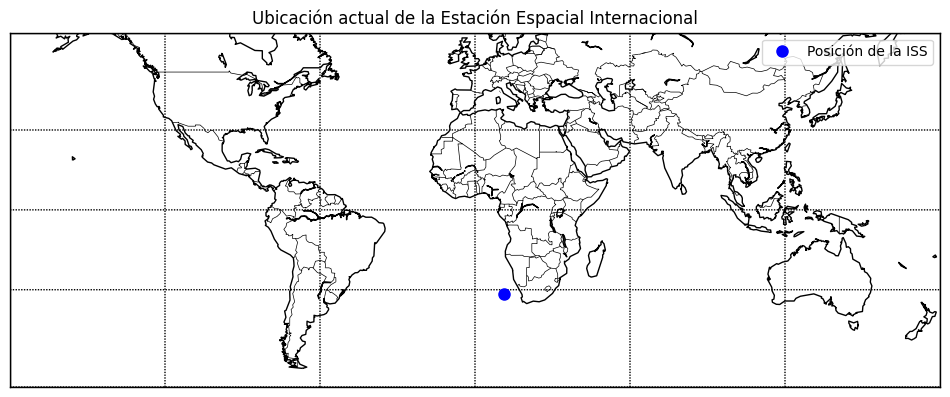

In [5]:
# Crear el mapa del mundo con Basemap
fig = plt.figure(figsize=(12, 9))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))

# Marcar la posición de la ISS en el mapa
x, y = m(longitude, latitude)
m.plot(x, y, markersize=8, color='blue', marker='o', linestyle='', label='Posición de la ISS')

plt.title('Ubicación actual de la Estación Espacial Internacional')
plt.legend()
plt.show()


Obtenemos así un mapa del mundo con la posición actual de la ISS marcada como un punto azul. 
Lo interesante de esta simulación, a parte del manejo de diferentes tipos de paquetes como *pandas* o *requests*, es ver cómo de rápido se mueve por el mapa.

Con motivo de visualizar de forma más completa la trayectoria que sigue la ISS, se va a ampliar el código anterior para que nos represente no solo la posición actual, si no que nos guarde y nos represente las posiciones de antiguas ejecuciones.

Para ello, partimos de la misma base anterior, pero se van a definir dos funciones para agilizar el proceso. La primera de ellas, *get_iss_position*, nos devuelve las coordenadas de latitud y longitud como ya he explicado. Sin embargo, la segunda de ellas, *save_position_to_csv*, nos crea un archivo csv y nos guarda las coordenadas actuales, de forma que con cada ejecución se va reescribiendo el archivo y añadiendo datos nuevos.

In [6]:
# Función para obtener la posición actual de la ISS
def get_iss_position():
    url = 'http://api.open-notify.org/iss-now.json'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['iss_position'], index=[0])
    latitude = float(df['latitude'].iloc[0])
    longitude = float(df['longitude'].iloc[0])
    return latitude, longitude

# Función para guardar las coordenadas en un archivo CSV
def save_position_to_csv(latitude, longitude, filename='iss_positions.csv'):
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        df = pd.DataFrame(columns=['Latitude', 'Longitude'])

    new_data = pd.DataFrame({'Latitude': [latitude], 'Longitude': [longitude]})
    df = pd.concat([df, new_data], ignore_index=True)
    df.to_csv(filename, index=False)

Utilizando las funciones definidas, extraemos las coordenadas, las guardamos en el archivo csv y leemos las ya existentes en el archivo (si las hay).

In [7]:
# Obtener la posición actual de la ISS
latitude, longitude = get_iss_position()

# Guardar las coordenadas en un archivo CSV
save_position_to_csv(latitude, longitude)

# Leer todas las posiciones almacenadas en el archivo CSV
all_positions_df = pd.read_csv('iss_positions.csv')

Una vez definidas todas las variables, nos ponemos con la representación de los resultados de la misma forma que para la posición actual anterior, añadiendo, sin embargo, las representaciones de las coordenadas anteriores (marcadas como gris).

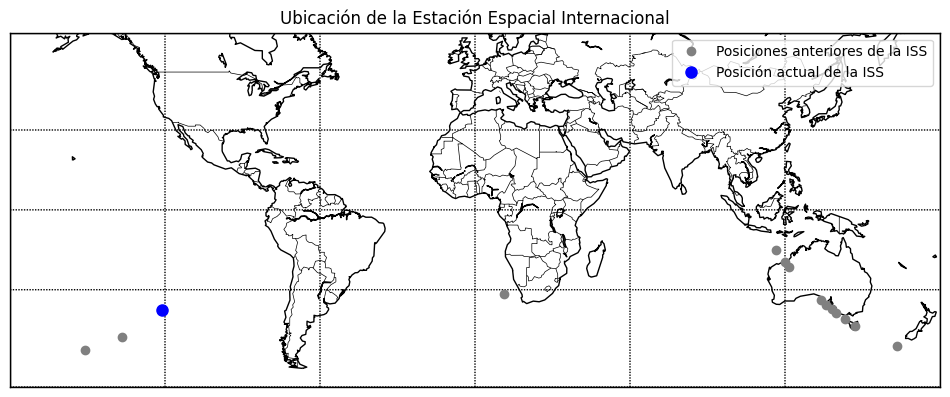

In [10]:
# Crear el mapa del mundo con Basemap
fig = plt.figure(figsize=(12, 9))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(-180, 181, 60))

# Marcar todas las posiciones almacenadas en el mapa
x, y = m(all_positions_df['Longitude'], all_positions_df['Latitude'])
m.plot(x, y, markersize=6, color='gray', marker='o', linestyle='', label='Posiciones anteriores de la ISS')
x_current, y_current = m(longitude, latitude)
m.plot(x_current, y_current, markersize=8, color='blue', marker='o', linestyle='', label='Posición actual de la ISS')

plt.title('Ubicación de la Estación Espacial Internacional')
plt.legend()
plt.show()